In [1]:
import tensorflow as tf
import numpy as np

In [2]:
X = tf.placeholder(tf.float32, shape=[None, 1]) # 1 feature 
y = tf.placeholder(tf.float32, shape=[None, 1]) # 1 = no of output class
W = tf.Variable(tf.zeros(1,1)) #weight dim = features X output class
b = tf.Variable(tf.zeros(1)) # no of features

yhat = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(y - yhat))
learn_rate = 0.0001
train_step = tf.train.GradientDescentOptimizer(learn_rate).minimize(cost)

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

steps = 1000

for i in range(steps):
    xs = np.array([[i]])
    ys = np.array([[2*i]])
    feed_dict = {X : xs, y : ys}
    sess.run(train_step, feed_dict=feed_dict)
    print("After %d interations" % i)
    print("W: %f" % sess.run(W))
    print("Cost: %f" % sess.run(cost, feed_dict=feed_dict))

ValueError: Shape must be rank 2 but is rank 1 for 'MatMul' (op: 'MatMul') with input shapes: [?,1], [1].

In [ ]:
for i in range(steps):
    xs = np.array([[i]])
    ys = np.array([[2*i]])
print(xs.shape)
print(ys.shape)

In [ ]:
import numpy as np
import tensorflow as tf

# CUSTOMIZABLE: Collect/Prepare data
datapoint_size = 1000
batch_size = 1
steps = 10000
actual_W = 2
actual_b = 10
learn_rate = 0.001
log_file = "/tmp/feature_1_batch_1"

# Model linear regression y = Wx + b
x = tf.placeholder(tf.float32, [None, 1], name="x")
W = tf.Variable(tf.zeros([1,1]), name="W")
b = tf.Variable(tf.zeros([1]), name="b")
with tf.name_scope("Wx_b") as scope:
  product = tf.matmul(x,W)
  y = product + b

# Add summary ops to collect data
W_hist = tf.histogram_summary("weights", W)
b_hist = tf.histogram_summary("biases", b)
y_hist = tf.histogram_summary("y", y)

y_ = tf.placeholder(tf.float32, [None, 1], name="y_")

# Cost function sum((y_-y)**2)
with tf.name_scope("cost") as scope:
  cost = tf.reduce_mean(tf.square(y_-y))
  cost_sum = tf.scalar_summary("cost", cost)

# Training using Gradient Descent to minimize cost
with tf.name_scope("train") as scope:
  train_step = tf.train.GradientDescentOptimizer(learn_rate).minimize(cost)

all_xs = []
all_ys = []
for i in range(datapoint_size):
  # Create fake data for y = W.x + b where W = 2, b = actual_b
  all_xs.append(i%10)
  all_ys.append(actual_W*(i%10)+actual_b)

all_xs = np.transpose([all_xs])
all_ys = np.transpose([all_ys])

sess = tf.Session()

# Merge all the summaries and write them out to /tmp/mnist_logs
merged = tf.merge_all_summaries()
writer = tf.train.SummaryWriter(log_file, sess.graph_def)

init = tf.initialize_all_variables()
sess.run(init)

for i in range(steps):
  if datapoint_size == batch_size:
    batch_start_idx = 0
  elif datapoint_size < batch_size:
    raise ValueError("datapoint_size: %d, must be greater than batch_size: %d" % (datapoint_size, batch_size))
  else:
    batch_start_idx = (i * batch_size) % (datapoint_size - batch_size)
  batch_end_idx = batch_start_idx + batch_size
  batch_xs = all_xs[batch_start_idx:batch_end_idx]
  batch_ys = all_ys[batch_start_idx:batch_end_idx]
  xs = np.array(batch_xs)
  ys = np.array(batch_ys)
  # Record summary data, and the accuracy every 10 steps
  if i % 10 == 0:
    all_feed = { x: all_xs, y_: all_ys }
    result = sess.run(merged, feed_dict=all_feed)
    writer.add_summary(result, i)
  else:
    feed = { x: xs, y_: ys }
    sess.run(train_step, feed_dict=feed)
    print("y: %s" % sess.run(y, feed_dict=feed))
    print("y_: %s" % ys)
    print("cost: %f" % sess.run(cost, feed_dict=feed))
  print("After %d iteration:" % i)
  print("W: %f" % sess.run(W))
  print("b: %f" % sess.run(b))

# NOTE: W should be close to actual_W, and b should be close to actual_b

### First graphs

In [3]:
import numpy as np
import tensorflow as tf

In [4]:
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)

In [5]:
sum_op = tf.add(x1, x2)
product_op = tf.multiply(x1, x2)

In [6]:
with tf.Session() as sess:
    sum_result = sess.run(sum_op, feed_dict={x1: 2.0, x2: 0.5})
    product_result = sess.run(product_op, feed_dict = {x1: 2.0, x2: 0.5})

In [7]:
sum_result

2.5

In [8]:
product_result

1.0

In [9]:
with tf.Session() as sess:
    sum_result = sess.run(sum_op, feed_dict={x1: [2.0, 2.0, 2.0], x2: [0.5, 1.0, 2.0]})
    product_result = sess.run(product_op, feed_dict = {x1: [2.0,4.0], x2: 0.5})

In [10]:
sum_result

array([ 2.5,  3. ,  4. ], dtype=float32)

In [11]:
product_result

array([ 1.,  2.], dtype=float32)

In [12]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
import matplotlib.pyplot as plt

In [13]:
n_input = 784
n_dense = 128

In [14]:
X = tf.placeholder(tf.float32, [None, 784])

### Define variable

In [15]:
b = tf.Variable(tf.zeros([n_dense]))
#W = tf.Variable(tf.random_normal([n_input, n_dense]))

W = tf.get_variable('W', shape = [n_input, n_dense], initializer=tf.contrib.layers.xavier_initializer())

In [16]:
z = tf.add(tf.matmul(X, W), b)
#a = tf.sigmoid(z)
#a = tf.tanh(z)
a = tf.nn.relu(z)

In [17]:
initializer_op = tf.global_variables_initializer()

In [18]:
with tf.Session() as sess:
    sess.run(initializer_op)
    
    layer_output = sess.run(a, feed_dict={X: np.random.random([1, n_input])})

In [19]:
layer_output

array([[ 0.        ,  0.03386669,  0.        ,  0.        ,  1.85816383,
         0.69289535,  0.        ,  0.78367698,  0.        ,  0.        ,
         0.        ,  0.        ,  0.59308636,  0.55778599,  1.1738162 ,
         1.04971206,  0.        ,  0.        ,  0.66086572,  0.        ,
         0.        ,  1.3123306 ,  0.        ,  0.30457622,  0.44378513,
         0.88140398,  1.24490952,  1.3729049 ,  0.        ,  0.        ,
         0.05543331,  0.44582373,  0.        ,  0.        ,  0.        ,
         0.        ,  0.61425978,  1.67193818,  0.        ,  0.53691077,
         1.46645391,  0.        ,  0.26752341,  1.62055886,  1.43217564,
         0.        ,  0.54529184,  0.        ,  0.        ,  0.13722968,
         0.        ,  0.07148276,  0.        ,  0.40188253,  0.        ,
         0.27739385,  0.80984521,  0.34370059,  0.        ,  0.        ,
         0.02612077,  0.00790104,  0.        ,  0.96761483,  0.02184189,
         0.        ,  0.28446221,  0.        ,  0. 

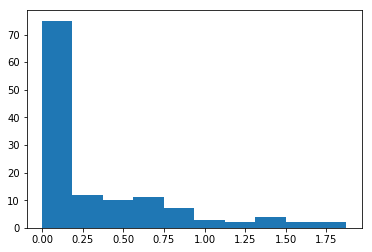

In [20]:
_ = plt.hist(np.transpose(layer_output))
plt.show()

In [21]:
import pandas as pd

### create small dataset

In [22]:
xs = [0., 1., 2., 3., 4., 5., 6., 7.] #feature - independent variable
ys = [-.82, -.94, -.12, .26, .39, .64, 1.02, 1.] # labels - dependent variable

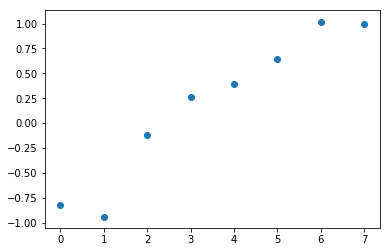

In [29]:
fig, ax = plt.subplots()
_ = ax.scatter(xs, ys)
plt.show()

In [30]:
m = tf.Variable(-0.5)
b = tf.Variable(1.0)

### define cost function

In [31]:
total_error = 0.0
for x, y in zip(xs,ys):
    y_model = m*x + b
    total_error += (y - y_model)**2

In [32]:
optimizer_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(total_error)

In [49]:
initializer_op = tf.global_variables_initializer()

### Execute sessions!!

In [37]:
with tf.Session() as sess:
    sess.run(initializer_op)
    
    n_epochs = 1000
    for i in range(n_epochs):
        sess.run(optimizer_op)
        
    slope , intercept = sess.run([m, b])

In [38]:
slope

0.29314372

In [39]:
intercept

-0.84175235

In [40]:
y_hat = intercept + slope*np.array(xs)

In [42]:
pd.DataFrame(list(zip(ys, y_hat)), columns=["y", "y_hat"])

,y,y_hat
0,-0.82,-0.841752
1,-0.94,-0.548609
2,-0.12,-0.255465
3,0.26,0.037679
4,0.39,0.330823
5,0.64,0.623966
6,1.02,0.917110
7,1.00,1.210254


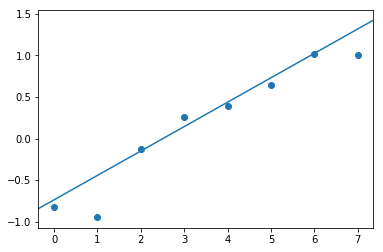

In [45]:
fig, ax = plt.subplots()
ax.scatter(xs, ys)
x_min, x_max = ax.get_xlim()
y_min, y_max = intercept, intercept + slope*(x_max - x_min)
ax.plot([x_min, x_max], [y_min, y_max])
_ = ax.set_xlim([x_min, x_max])
plt.show()

In [46]:
ys_model = m*xs + b
total_error = tf.reduce_sum((ys-ys_model)**2)

In [47]:
optimizer_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(total_error)

In [50]:
initializer_op = tf.global_variables_initializer()

In [51]:
with tf.Session() as sess:
    sess.run(initializer_op)
    
    n_epochs = 1000
    for i in range(n_epochs):
        sess.run(optimizer_op)
        
    slope , intercept = sess.run([m, b])

In [52]:
y_hat = intercept + slope*np.array(xs)

In [53]:
pd.DataFrame(list(zip(ys, y_hat)), columns=["y", "y_hat"])

,y,y_hat
0,-0.82,-0.841752
1,-0.94,-0.548609
2,-0.12,-0.255465
3,0.26,0.037679
4,0.39,0.330823
5,0.64,0.623966
6,1.02,0.917110
7,1.00,1.210254


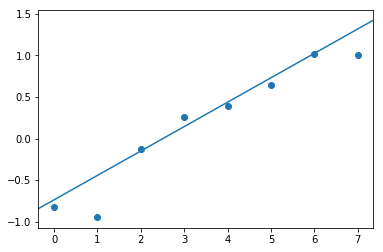

In [54]:
fig, ax = plt.subplots()
ax.scatter(xs, ys)
x_min, x_max = ax.get_xlim()
y_min, y_max = intercept, intercept + slope*(x_max - x_min)
ax.plot([x_min, x_max], [y_min, y_max])
_ = ax.set_xlim([x_min, x_max])
plt.show()

In [83]:
xs = np.linspace(0., 8., 800000)
ys = 0.3*xs-0.8+ np.random.normal(scale=.25, size=len(xs))

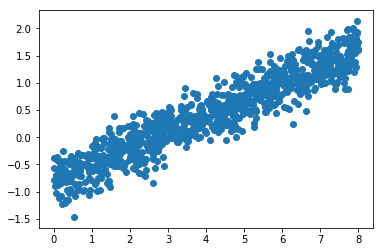

In [84]:
fig, ax = plt.subplots()
data_subset = pd.DataFrame(list(zip(xs, ys)), columns=["x", 'y']).sample(n=1000)
_ = ax.scatter(data_subset.x, data_subset.y)
plt.show()

In [85]:
m = tf.Variable(-0.5)
b = tf.Variable(1.0)

In [86]:
batch_size = 8

In [87]:
xs_placeholder = tf.placeholder(tf.float32, [batch_size])
ys_placeholder = tf.placeholder(tf.float32, [batch_size])

In [88]:
ys_model = m*xs_placeholder + b
total_error = tf.reduce_sum((ys_placeholder - ys_model)**2)

In [89]:
optimizer_op = tf.train.GradientDescentOptimizer(0.001).minimize(total_error)

In [90]:
initializer_op = tf.global_variables_initializer()

In [91]:
with tf.Session() as sess:
    sess.run(initializer_op)
    
    n_batches = 1000
    for i in range(n_batches):
        random_indices = np.random.randint(len(xs), size=batch_size)
        
        feed = {
            xs_placeholder: xs[random_indices],
            ys_placeholder: ys[random_indices]
            }
        sess.run(optimizer_op, feed_dict=feed)
    slope, intercept = sess.run([m, b])

In [92]:
slope

0.29676059

In [93]:
intercept

-0.75645107

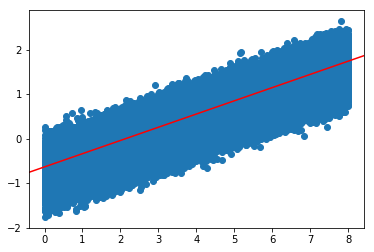

In [95]:
fig, ax = plt.subplots()
ax.scatter(xs, ys)
x_min, x_max = ax.get_xlim()
y_min, y_max = intercept, intercept + slope*(x_max - x_min)
ax.plot([x_min, x_max], [y_min, y_max], color = 'red')
_ = ax.set_xlim([x_min, x_max])
plt.show()